Voxelmorph Training on 3-D volumes downsampled

# Setup

In [ ]:
!pip install voxelmorph 
!pip install --upgrade nibabel
!pip install nilearn

     |████████████████████████████████| 81kB 5.4MB/s 
     |████████████████████████████████| 92kB 7.3MB/s 
     |████████████████████████████████| 3.3MB 11.6MB/s 
  Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2
     |████████████████████████████████| 3.0MB 9.7MB/s 


In [ ]:
# imports
import os, sys

# third party imports
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2.'), 'This tutorial assumes Tensorflow 2.0+'
print(tf.__version__)
import nibabel as nb
import nilearn as nl
import nilearn.image

2.3.0


In [ ]:
# local imports
import voxelmorph as vxm
import neurite as ne
from tensorflow.keras.datasets import mnist

In [ ]:

import time
import matplotlib.pyplot as plt
from glob import glob
import nibabel.processing as nbp


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/My Drive/Image_Registration_Project/dataset_ants_resampled/Brain_extracted_Train/T1_BET_undersampled/"
os.chdir(data_path)
filelist = glob(os.path.join(data_path,'*'))
print(filelist)
print("Number of images in folder: {}".format(len(filelist)))

['/content/drive/My Drive/Image_Registration_Project/dataset_ants_resampled/Brain_extracted_Train/T1_BET_undersampled/Bet_IXI079-HH-1388-T1_resampled.nii.gz', '/content/drive/My Drive/Image_Registration_Project/dataset_ants_resampled/Brain_extracted_Train/T1_BET_undersampled/Bet_IXI315-IOP-0888-T1_resampled.nii.gz', '/content/drive/My Drive/Image_Registration_Project/dataset_ants_resampled/Brain_extracted_Train/T1_BET_undersampled/Bet_IXI058-Guys-0726-T1_resampled.nii.gz', '/content/drive/My Drive/Image_Registration_Project/dataset_ants_resampled/Brain_extracted_Train/T1_BET_undersampled/Bet_IXI588-IOP-1158-T1_resampled.nii.gz', '/content/drive/My Drive/Image_Registration_Project/dataset_ants_resampled/Brain_extracted_Train/T1_BET_undersampled/Bet_IXI371-IOP-0970-T1_resampled.nii.gz', '/content/drive/My Drive/Image_Registration_Project/dataset_ants_resampled/Brain_extracted_Train/T1_BET_undersampled/Bet_IXI144-Guys-0788-T1_resampled.nii.gz', '/content/drive/My Drive/Image_Registration_

# Data Preprocessing

In [ ]:
data_np = np.zeros(shape=(len(filelist), 128, 128, 128))
data_np.shape

(50, 128, 128, 128)

In [ ]:
target_shape = np.array((128,128,128))
new_resolution = [2,]*3
new_affine = np.zeros((4,4))
new_affine[:3,:3] = np.diag(new_resolution)
new_affine[:3,3] = target_shape*new_resolution/2.*-1
new_affine[3,3] = 1.

In [ ]:
new_affine

array([[   2.,    0.,    0., -128.],
       [   0.,    2.,    0., -128.],
       [   0.,    0.,    2., -128.],
       [   0.,    0.,    0.,    1.]])

In [ ]:
image_list = []
img_shape = np.array((64, 64, 64))
for i in range(len(filelist)):
  file = filelist[i]
  #inp_nb = nb.load(file)
  inp_nb = nl.image.load_img(file)
  #interim_nb = inp_nb
  interim_nb = nl.image.resample_img(inp_nb, target_affine=new_affine, target_shape=target_shape, interpolation='nearest')
  # interim_nb = nbp.resample_from_to(from_img=inp_nb, to_vox_map=(img_shape, inp_nb.affine), order=3)
  #interim_nb = nbp.conform(from_img=inp_nb,out_shape=(64, 64, 64), voxel_size=(1.0, 1.0, 1.0), order=3, orientation="RAS")
  print("=========== voxel resolution, centre, affines, orientation and shape ===========")
  print("voxel resolution : {}".format(interim_nb.header["pixdim"][1:4]))
  print()
  print("Centre of the image: {}".format([float(interim_nb.header["qoffset_x"]), float(interim_nb.header["qoffset_y"]), float(interim_nb.header["qoffset_z"])]))
  print()
  print("Affine matrix: {}".format(nb.aff2axcodes(interim_nb.affine)))
  print()
  print("Orientation: {}".format(interim_nb.affine))
  print()
  print("Shape of the resampled image: {}".format(interim_nb.header.get_data_shape()))
  print()
  op_np = interim_nb.dataobj
  op_np = op_np/np.max(op_np)
  data_np[i,:,:,:] = op_np

  image_list.append(op_np)


=========== voxel resolution, centre, affines, orientation and shape ===========
voxel resolution : [2. 2. 2.]

Centre of the image: [-128.0, -128.0, -128.0]

Affine matrix: ('R', 'A', 'S')

Orientation: [[   2.    0.    0. -128.]
 [   0.    2.    0. -128.]
 [   0.    0.    2. -128.]
 [   0.    0.    0.    1.]]

Shape of the resampled image: (128, 128, 128)

=========== voxel resolution, centre, affines, orientation and shape ===========
voxel resolution : [2. 2. 2.]

Centre of the image: [-128.0, -128.0, -128.0]

Affine matrix: ('R', 'A', 'S')

Orientation: [[   2.    0.    0. -128.]
 [   0.    2.    0. -128.]
 [   0.    0.    2. -128.]
 [   0.    0.    0.    1.]]

Shape of the resampled image: (128, 128, 128)

=========== voxel resolution, centre, affines, orientation and shape ===========
voxel resolution : [2. 2. 2.]

Centre of the image: [-128.0, -128.0, -128.0]

Affine matrix: ('R', 'A', 'S')

Orientation: [[   2.    0.    0. -128.]
 [   0.    2.    0. -128.]
 [   0.    0.    2. 

In [ ]:
image_list = []
img_shape = np.array((128, 128, 128))
for i in range(len(filelist)):
  file = filelist[i]
  #inp_nb = nb.load(file)
  inp_nb = nl.image.load_img(file)
  #interim_nb = inp_nb
  #interim_nb = nl.image.resample_img(inp_nb, target_affine=new_affine, target_shape=target_shape, interpolation='nearest')
  # interim_nb = nbp.resample_from_to(from_img=inp_nb, to_vox_map=(img_shape, inp_nb.affine), order=3)
  #interim_nb = nbp.conform(from_img=inp_nb,out_shape=(64, 64, 64), voxel_size=(1.0, 1.0, 1.0), order=3, orientation="RAS")
  print("=========== voxel resolution, centre, affines, orientation and shape ===========")
  print("voxel resolution : {}".format(inp_nb.header["pixdim"][1:4]))
  print()
  print("Centre of the image: {}".format([float(inp_nb.header["qoffset_x"]), float(inp_nb.header["qoffset_y"]), float(inp_nb.header["qoffset_z"])]))
  print()
  print("Affine matrix: {}".format(nb.aff2axcodes(inp_nb.affine)))
  print()
  print("Orientation: {}".format(inp_nb.affine))
  print()
  print("Shape of the resampled image: {}".format(inp_nb.header.get_data_shape()))
  print()
  op_np = inp_nb.dataobj
  final_dim = op_np.shape[2]
  tails = int((128.0 - final_dim)//2)
  left_tail = tails
  right_tail = 128-tails
  print(tails)
  op_np = op_np/np.max(op_np)
  data_np[i,:,:,0:final_dim] = op_np

  image_list.append(op_np)

=========== voxel resolution, centre, affines, orientation and shape ===========
voxel resolution : [1.8823819 1.8823819 2.4162073]

Centre of the image: [-94.84149932861328, 109.85114288330078, -121.7565689086914]

Affine matrix: ('P', 'S', 'R')

Orientation: [[ 8.79576621e-02 -2.68548637e-02  2.41332194e+00 -9.48414993e+01]
 [-1.86379234e+00  2.47805111e-01  1.16463589e-01  1.09851143e+02]
 [ 2.48803620e-01  1.86580629e+00  1.92673588e-02 -1.21756569e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Shape of the resampled image: (128, 128, 75)

26
=========== voxel resolution, centre, affines, orientation and shape ===========
voxel resolution : [1.8823558 1.8823828 2.4166691]

Centre of the image: [-87.07373809814453, 142.47500610351562, -118.4456787109375]

Affine matrix: ('P', 'S', 'R')

Orientation: [[-4.02367154e-04  1.08001779e-02  2.41662930e+00 -8.70737381e+01]
 [-1.88235577e+00 -1.18406638e-06 -5.16580267e-04  1.42475006e+02]
 [ 1.12455212e-06  1.8823

In [ ]:
print(data_np[7,64,:,:])
data_np.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(24, 128, 128, 128)

In [ ]:
def vxm_data_generator(x_data, batch_size=32):
    """
    Generator that takes in data of size [N, H, W], and yields data for
    our custom vxm model. Note that we need to provide numpy data for each
    input, and each output.

    inputs:  moving [bs, H, W, 1], fixed image [bs, H, W, 1]
    outputs: moved image [bs, H, W, 1], zero-gradient [bs, H, W, 2]
    """

    # preliminary sizing
    vol_shape = x_data.shape[1:] # extract data shape
    ndims = len(vol_shape)
    
    # prepare a zero array the size of the deformation
    # we'll explain this below
    zero_phi = np.zeros([batch_size, *vol_shape, ndims])
    
    while True:
        # prepare inputs:
        # images need to be of the size [batch_size, H, W, 1]
        idx1 = np.random.randint(0, x_data.shape[0], size=batch_size)
        moving_images = x_data[idx1, ..., np.newaxis]
        idx2 = np.random.randint(0, x_data.shape[0], size=batch_size)
        fixed_images = x_data[idx2, ..., np.newaxis]
        inputs = [moving_images, fixed_images]
        
        # prepare outputs (the 'true' moved image):
        # of course, we don't have this, but we know we want to compare 
        # the resulting moved image with the fixed image. 
        # we also wish to penalize the deformation field. 
        outputs = [fixed_images, zero_phi]
        
        yield (inputs, outputs)

In [ ]:
train_generator = vxm_data_generator(data_np[:, :, :, :], batch_size=1)
train_in_sample, train_out_sample = next(train_generator)

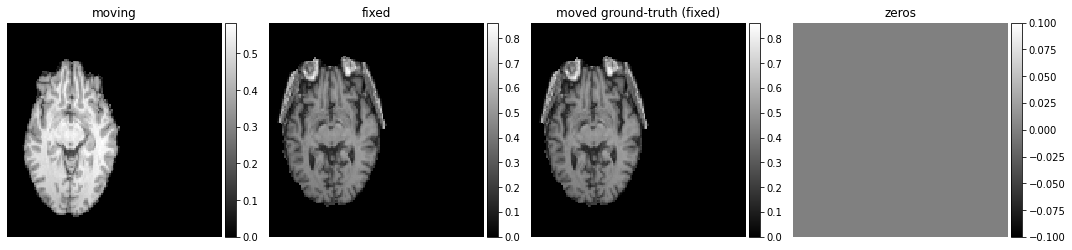

In [ ]:
# visualize
images = [img[0, :, 64, :, 0] for img in train_in_sample + train_out_sample]
titles = ['moving', 'fixed', 'moved ground-truth (fixed)', 'zeros']
ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True);

Validation generator

In [ ]:
validation_generator = vxm_data_generator(data_np[10:16, :, :, :], batch_size=1)
val_in_sample, val_out_sample = next(validation_generator)


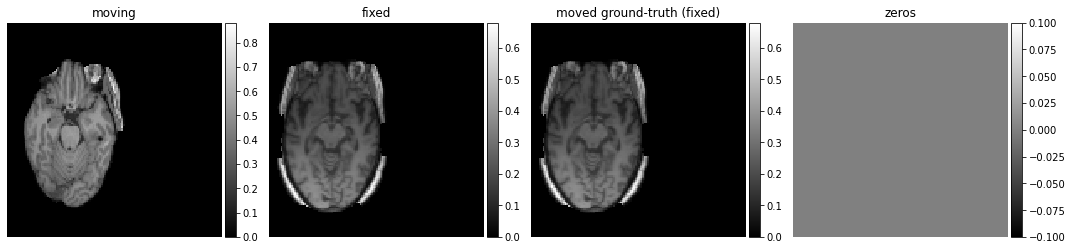

In [ ]:
# visualize
images = [img[0, :, 64, :, 0] for img in val_in_sample + val_out_sample]
titles = ['moving', 'fixed', 'moved ground-truth (fixed)', 'zeros']
ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True);

# Model Building

In [ ]:
nb_features = [[32, 32, 32, 32, 32], [32, 32, 32, 32, 32, 32, 16]]
vol_shape = data_np.shape[1:]
print("shape of volume: {}".format(vol_shape))
print("Filters in Unet: {}".format(nb_features))

shape of volume: (128, 128, 128)
Filters in Unet: [[32, 32, 32, 32, 32], [32, 32, 32, 32, 32, 32, 16]]


In [ ]:
# unet
vxm_model = vxm.networks.VxmDense(vol_shape, nb_features, int_steps=3)

# losses and loss weights
losses = [vxm.losses.NCC().loss, vxm.losses.Grad('l2').loss]
loss_weights = [1, 1]

Instructions for updating:
Use fn_output_signature instead


In [ ]:
vxm_model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4), loss=losses, loss_weights=loss_weights)

In [ ]:
def plot_history(hist, loss_name='loss'):
    # Simple function to plot training history.
    plt.figure()
    plt.plot(hist.epoch, hist.history[loss_name], '.-')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()


# Training Model

In [ ]:
hist = vxm_model.fit_generator(train_generator, epochs=30, steps_per_epoch=5, verbose=2);

Epoch 1/30
5/5 - 19s - loss: -2.7826e-02 - transformer_loss: -2.8041e-02 - flow_resize_loss: 2.1498e-04
Epoch 2/30
5/5 - 19s - loss: -2.4084e-02 - transformer_loss: -2.4198e-02 - flow_resize_loss: 1.1372e-04
Epoch 3/30
5/5 - 19s - loss: -2.7183e-02 - transformer_loss: -2.7219e-02 - flow_resize_loss: 3.5955e-05
Epoch 4/30
5/5 - 19s - loss: -4.8810e-02 - transformer_loss: -4.8830e-02 - flow_resize_loss: 1.9796e-05
Epoch 5/30
5/5 - 19s - loss: -5.0191e-02 - transformer_loss: -5.0199e-02 - flow_resize_loss: 8.5043e-06
Epoch 6/30
5/5 - 19s - loss: -2.3974e-02 - transformer_loss: -2.3982e-02 - flow_resize_loss: 8.1705e-06
Epoch 7/30
5/5 - 19s - loss: -2.9143e-02 - transformer_loss: -2.9162e-02 - flow_resize_loss: 1.9079e-05
Epoch 8/30
5/5 - 18s - loss: -2.0813e-02 - transformer_loss: -2.0863e-02 - flow_resize_loss: 4.9318e-05
Epoch 9/30
5/5 - 19s - loss: -2.6663e-02 - transformer_loss: -2.6769e-02 - flow_resize_loss: 1.0636e-04
Epoch 10/30
5/5 - 18s - loss: -5.3527e-02 - transformer_loss: -5

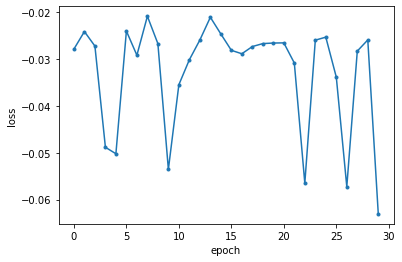

In [ ]:
# as before, let's visualize what happened
plot_history(hist)

# Validation and Prediction

In [ ]:
# prediction
val_pred = vxm_model.predict(val_in_sample)


In [ ]:
mynb_np1 = train_in_sample[0][0,:,:,:, 0]
mynb_np2 = train_in_sample[1][0,:,:,:, 0]

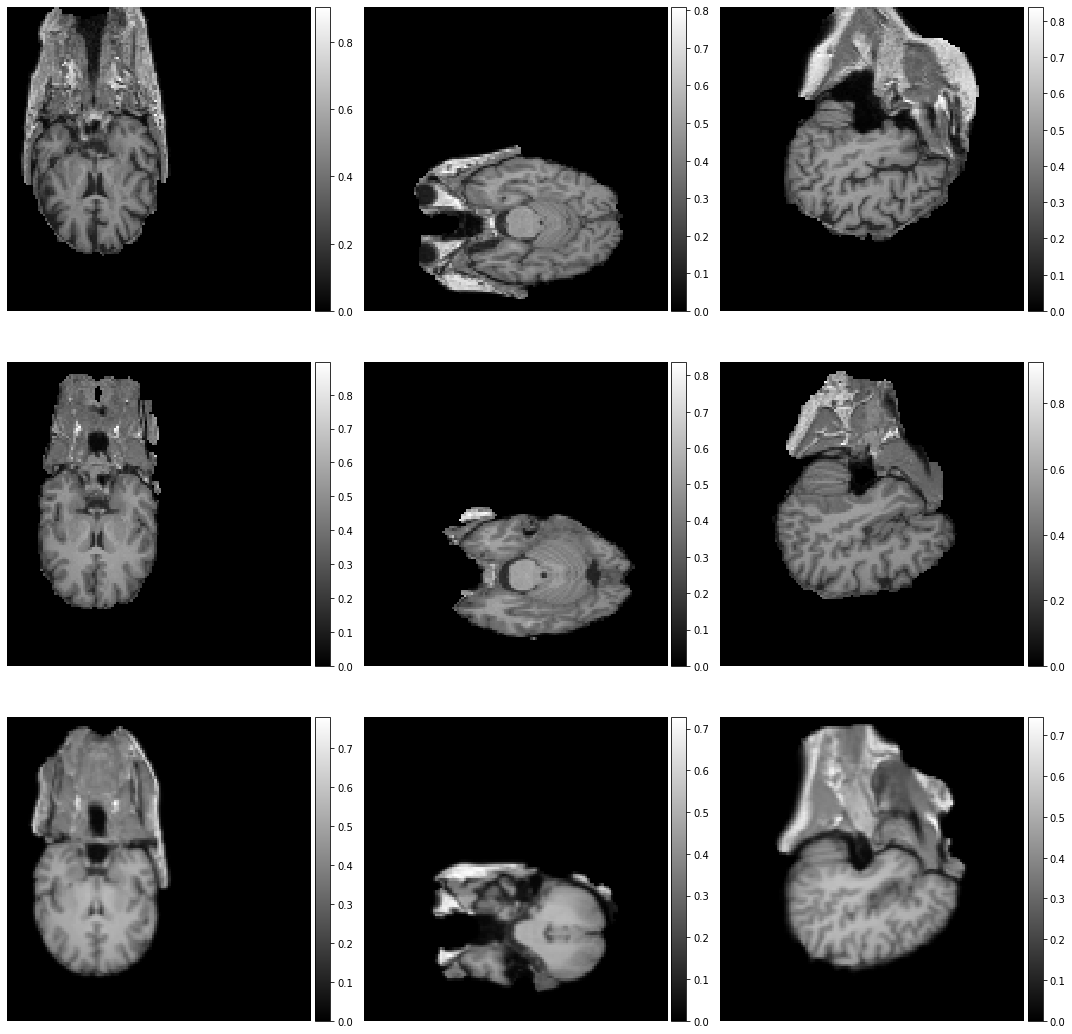

In [ ]:
mid_slices_fixed = [np.take(mynb_np2, 55, axis=d) for d in range(3)]
mid_slices_fixed[1] = np.rot90(mid_slices_fixed[1], 1)
mid_slices_fixed[2] = np.rot90(mid_slices_fixed[2], -1)

mid_slices_moving = [np.take(mynb_np1, 55, axis=d) for d in range(3)]
mid_slices_moving[1] = np.rot90(mid_slices_moving[1], 1)
mid_slices_moving[2] = np.rot90(mid_slices_moving[2], -1)

mid_slices_pred = [np.take(val_pred[0][0, :, :, :, 0], 55, axis=d) for d in range(3)]
mid_slices_pred[1] = np.rot90(mid_slices_pred[1], 1)
mid_slices_pred[2] = np.rot90(mid_slices_pred[2], -1)
ne.plot.slices(mid_slices_fixed + mid_slices_moving + mid_slices_pred, cmaps=['gray'], do_colorbars=True, grid=[3,3]);

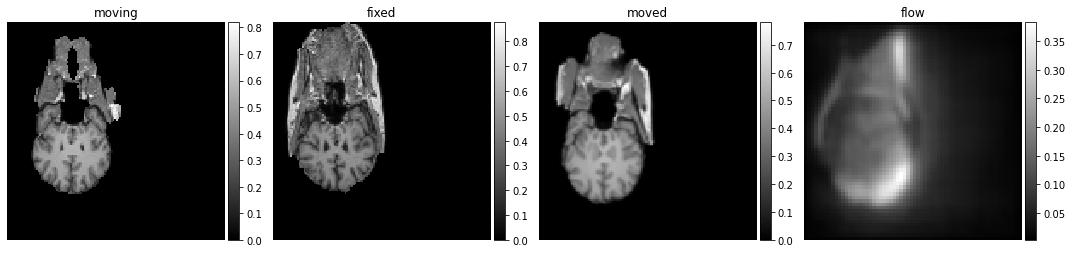

In [ ]:
# visualize registration
images = [img[0, 45, :, :, 0] for img in train_in_sample + val_pred] 
titles = ['moving', 'fixed', 'moved', 'flow']
ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True);

In [ ]:
flow = val_pred[1].squeeze()
ne.plot.flow([flow], width=5);

AssertionError: ignored